In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import json


warnings.filterwarnings("ignore")

In [3]:
third_party_df = pd.read_csv("third-party_data/test.csv")
# I used a dataset from kaggle about amazon reviews,
# I used only test data that contains 400 000 reviews,
# because It would take a lot more time to train on train data with 3 600 000 reviews.

In [4]:
third_party_df.columns = ["pos_neg", "title", "text"]
third_party_df.pos_neg -= 1

In [5]:
third_party_df.drop("title", axis=1, inplace=True)

In [6]:
third_party_df.head(10)

,pos_neg,text
0,1,Despite the fact that I have only played a sma...
1,0,I bought this charger in Jul 2003 and it worke...
2,1,Check out Maha Energy's website. Their Powerex...
3,1,Reviewed quite a bit of the combo players and ...
4,0,I also began having the incorrect disc problem...
5,0,"I love the style of this, but after a couple y..."
6,0,I cannot scroll through a DVD menu that is set...
7,1,"Exotic tales of the Orient from the 1930's. ""D..."
8,0,"Firstly,I enjoyed the format and tone of the b..."
9,1,"I currently live in Europe, and this is the bo..."


In [7]:
third_party_df.shape

(399999, 2)

In [8]:
third_party_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   pos_neg  399999 non-null  int64 
 1   text     399999 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [9]:
third_party_df.pos_neg.mean() # good distribution

0.499998749996875

In [10]:
init_df_lab = pd.read_csv("init_data/labels.csv")
init_df_rev = pd.read_csv("init_data/reviews.csv")

In [11]:
init_df_lab.head()

,id,sentiment
0,168,Positive
1,26,Positive
2,64,Positive
3,10,Positive
4,111,Negative


In [12]:
init_df_rev.head()

,id,text
0,168,"Hi Leah, I ordered this early to give to a co-..."
1,26,"Good evening, \n I just received my order! I ..."
2,64,I couldn’t find where I could write a review b...
3,10,I received my order today and gave it to my si...
4,111,"﻿Max,\n\nWe received the heart but sadly are d..."


In [13]:
init_df_lab.shape, init_df_rev.shape

((254, 2), (254, 2))

In [14]:
init_df = init_df_lab.merge(init_df_rev, on="id").set_index("id")

In [15]:
init_df.columns = ["pos_neg", "text"]

In [16]:
init_df.pos_neg.replace({"Positive" : 1, "Negative" : 0}, inplace=True)

In [17]:
init_df.head()

,pos_neg,text
id,,
168,1,"Hi Leah, I ordered this early to give to a co-..."
26,1,"Good evening, \n I just received my order! I ..."
64,1,I couldn’t find where I could write a review b...
10,1,I received my order today and gave it to my si...
111,0,"﻿Max,\n\nWe received the heart but sadly are d..."


In [18]:
init_df.shape

(254, 2)

In [19]:
list_of_texts = list(third_party_df.text.values)
list_of_texts.extend(list(init_df.text.values)) 
# create list of texts that contains reviews from given data and from third-party dataset 
# so that tokenizer will then contain words from both datasets

In [20]:
len(list_of_texts)

400253

In [21]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=30000, oov_token="<OOV>")
# limited number of words to 30 000 to optimize the future model
tokenizer.fit_on_texts(list_of_texts)

In [22]:
# Convert the tokenizer to a JSON string
tokenizer_json = tokenizer.to_json()

# Save the JSON string to a file
with open('models/tokenizer.json', 'w', encoding='utf-8') as f:
    json.dump(tokenizer_json, f)


In [23]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'i': 4,
 'a': 5,
 'to': 6,
 'it': 7,
 'of': 8,
 'this': 9,
 'is': 10,
 'in': 11,
 'for': 12,
 'that': 13,
 'was': 14,
 'you': 15,
 'not': 16,
 'with': 17,
 'but': 18,
 'on': 19,
 'have': 20,
 'my': 21,
 'book': 22,
 'are': 23,
 'as': 24,
 'one': 25,
 'be': 26,
 'so': 27,
 'all': 28,
 'if': 29,
 'like': 30,
 'they': 31,
 'very': 32,
 'at': 33,
 'from': 34,
 'just': 35,
 'or': 36,
 'good': 37,
 'would': 38,
 'great': 39,
 'about': 40,
 'out': 41,
 'an': 42,
 'has': 43,
 'me': 44,
 'had': 45,
 'more': 46,
 'will': 47,
 'when': 48,
 'what': 49,
 "it's": 50,
 'up': 51,
 'get': 52,
 'by': 53,
 'read': 54,
 'no': 55,
 'there': 56,
 'time': 57,
 'only': 58,
 'can': 59,
 'your': 60,
 'he': 61,
 'his': 62,
 'some': 63,
 'really': 64,
 'movie': 65,
 'well': 66,
 'do': 67,
 'them': 68,
 "don't": 69,
 'than': 70,
 'other': 71,
 'who': 72,
 'we': 73,
 'even': 74,
 'first': 75,
 'much': 76,
 'these': 77,
 'her': 78,
 'after': 79,
 'because': 80,
 'were': 81,
 'whic

In [24]:
len(word_index)

280324

In [25]:
del list_of_texts

In [26]:
sequences = tokenizer.texts_to_sequences(list(third_party_df.text.values)) # creating sequences from amazon data

In [27]:
max(list(map(len, sequences))) # max lenth of sequence

222

In [28]:
np.mean(list(map(len, sequences))) # mean lenth of sequence

75.11901779754449

In [29]:
len(sequences) # number of sequences

399999

In [30]:
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=151, padding="post", truncating="post")
# I have been experimenting with choosing proper number for param "maxlen" orienting on the mean lenth of sequences
# and 150 is the best one but I will replace 151th elems with label to be able to easily shuffle my data 

In [31]:
sequences[:, 150] = third_party_df.pos_neg.values

In [32]:
np.random.shuffle(sequences)

In [33]:
x = sequences[:, :150]
y = sequences[:, 150]

In [34]:
x.shape, y.shape

((399999, 150), (399999,))

# Training

In [35]:
model_review_clf = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=30000, output_dim=8, input_length=150),
    tf.keras.layers.Conv1D(16, 3, activation="relu"),
    tf.keras.layers.Conv1D(16, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(16, 3, activation="relu"),
    tf.keras.layers.Conv1D(16, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(32, 3, activation="relu"),
    tf.keras.layers.Conv1D(32, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(32, 3, activation="relu"),
    tf.keras.layers.Conv1D(32, 3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
    
])

model_review_clf.compile(optimizer=tf.keras.optimizers.Adam(), 
                         loss=tf.keras.losses.binary_crossentropy,
                         metrics=["acc"])

In [40]:
model_review_clf = tf.keras.models.load_model("models/model_review_clf.h5")

In [36]:
model_review_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            240000    
                                                                 
 conv1d_8 (Conv1D)           (None, 148, 16)           400       
                                                                 
 conv1d_9 (Conv1D)           (None, 146, 16)           784       
                                                                 
 batch_normalization_7 (Batc  (None, 146, 16)          64        
 hNormalization)                                                 
                                                                 
 conv1d_10 (Conv1D)          (None, 144, 16)           784       
                                                                 
 conv1d_11 (Conv1D)          (None, 142, 16)           784       
                                                      

In [37]:
history = model_review_clf.fit(x, y, validation_split=0.2, epochs=30, batch_size=32)

Epoch 1/30
10000/10000 [==============================] - 912s 91ms/step - loss: 0.3866 - acc: 0.8085 - val_loss: 0.3161 - val_acc: 0.8702
Epoch 2/30
10000/10000 [==============================] - 933s 93ms/step - loss: 0.2472 - acc: 0.9005 - val_loss: 0.2255 - val_acc: 0.9099
Epoch 3/30
10000/10000 [==============================] - 887s 89ms/step - loss: 0.2078 - acc: 0.9206 - val_loss: 0.6776 - val_acc: 0.7203
Epoch 4/30
10000/10000 [==============================] - 884s 88ms/step - loss: 0.1804 - acc: 0.9339 - val_loss: 0.2716 - val_acc: 0.8954
Epoch 5/30
10000/10000 [==============================] - 908s 91ms/step - loss: 0.1597 - acc: 0.9428 - val_loss: 0.2375 - val_acc: 0.9080
Epoch 6/30
10000/10000 [==============================] - 894s 89ms/step - loss: 0.1419 - acc: 0.9506 - val_loss: 0.2758 - val_acc: 0.8984
Epoch 7/30
10000/10000 [==============================] - 893s 89ms/step - loss: 0.1277 - acc: 0.9565 - val_loss: 0.2698 - val_acc: 0.9032
Epoch 8/30
10000/10000 [===

### I have got an overfitting and I suppose it is related to difficulties to describe the data. The problem could have been removed with training data but not only test but we will try to get the best from our limited time

In [38]:
model_review_clf.save("models/model_review_clf.h5")

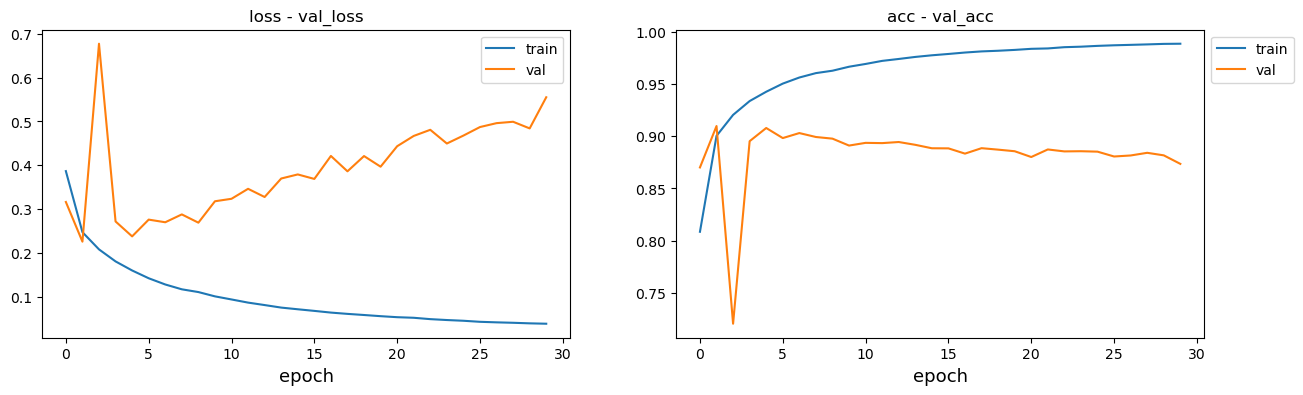

In [39]:
# plotting the history of training
fig, axis = plt.subplots(1, 2, figsize=(15, 4))

axis[0].plot(history.history["loss"], label="train")
axis[0].plot(history.history["val_loss"], label="val")
axis[0].set_title("loss - val_loss")
axis[0].set_xlabel("epoch", fontsize=13)
axis[0].legend(bbox_to_anchor=(1.0, 1.0))


axis[1].plot(history.history["acc"], label="train")
axis[1].plot(history.history["val_acc"], label="val")
axis[1].set_title("acc - val_acc")
axis[1].set_xlabel("epoch", fontsize=13)
axis[1].legend(bbox_to_anchor=(1.0, 1.0))


plt.show()

In [49]:
model_review_clf = tf.keras.models.load_model("models/model_review_clf.h5")

In [42]:
model_review_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            240000    
                                                                 
 conv1d_8 (Conv1D)           (None, 148, 16)           400       
                                                                 
 conv1d_9 (Conv1D)           (None, 146, 16)           784       
                                                                 
 batch_normalization_7 (Batc  (None, 146, 16)          64        
 hNormalization)                                                 
                                                                 
 conv1d_10 (Conv1D)          (None, 144, 16)           784       
                                                                 
 conv1d_11 (Conv1D)          (None, 142, 16)           784       
                                                      

### So we will also train on the whole third-party data a bit more

In [43]:
history = model_review_clf.fit(x, y, epochs=10, batch_size=32)

Epoch 1/10
12500/12500 [==============================] - 1038s 83ms/step - loss: 0.1137 - acc: 0.9657
Epoch 2/10
12500/12500 [==============================] - 1066s 85ms/step - loss: 0.0958 - acc: 0.9708
Epoch 3/10
12500/12500 [==============================] - 1074s 86ms/step - loss: 0.0852 - acc: 0.9745
Epoch 4/10
12500/12500 [==============================] - 1068s 85ms/step - loss: 0.0777 - acc: 0.9769
Epoch 5/10
12500/12500 [==============================] - 1082s 87ms/step - loss: 0.0717 - acc: 0.9789
Epoch 6/10
12500/12500 [==============================] - 1067s 85ms/step - loss: 0.0671 - acc: 0.9801
Epoch 7/10
12500/12500 [==============================] - 1045s 84ms/step - loss: 0.0630 - acc: 0.9815
Epoch 8/10
12500/12500 [==============================] - 1066s 85ms/step - loss: 0.0601 - acc: 0.9824
Epoch 9/10
12500/12500 [==============================] - 1176s 94ms/step - loss: 0.0569 - acc: 0.9834
Epoch 10/10
12500/12500 [==============================] - 1162s 93ms/ste

In [44]:
model_review_clf.save("models/model_review_clf.h5")

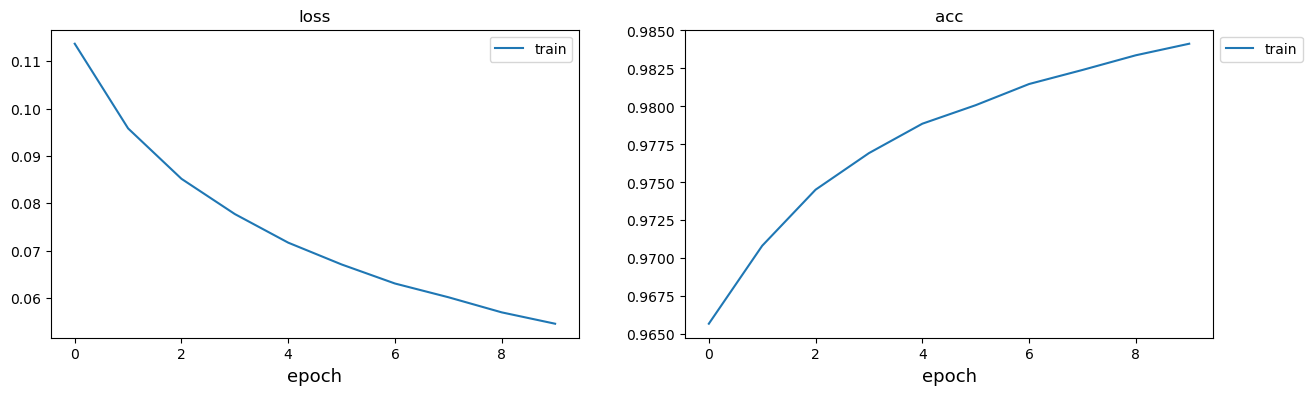

In [45]:
# plotting the history of training
fig, axis = plt.subplots(1, 2, figsize=(15, 4))

axis[0].plot(history.history["loss"], label="train")
#axis[0].plot(history.history["val_loss"], label="val")
axis[0].set_title("loss")
axis[0].set_xlabel("epoch", fontsize=13)
axis[0].legend(bbox_to_anchor=(1.0, 1.0))


axis[1].plot(history.history["acc"], label="train")
#axis[1].plot(history.history["val_acc"], label="val")
axis[1].set_title("acc")
axis[1].set_xlabel("epoch", fontsize=13)
axis[1].legend(bbox_to_anchor=(1.0, 1.0))


plt.show()

### Preprocess given data

In [35]:
init_sequences = tokenizer.texts_to_sequences(list(init_df.text.values))

In [36]:
max(list(map(len, init_sequences)))

266

In [37]:
np.mean(list(map(len, init_sequences)))

55.93307086614173

In [38]:
len(init_sequences)

254

In [39]:
np.sum(init_sequences == 1) # check if there are OOV tokens

0

In [40]:
init_sequences = tf.keras.preprocessing.sequence.pad_sequences(init_sequences, maxlen=151, padding="post", truncating="post")

In [41]:
init_sequences[:, 150] = init_df.pos_neg.values

In [42]:
np.random.shuffle(init_sequences)

In [43]:
init_x = init_sequences[:, :150]
init_y = init_sequences[:, 150]

In [44]:
init_x.shape, init_y.shape

((254, 150), (254,))

In [47]:
model_review_clf = tf.keras.models.load_model("models/model_review_clf.h5")

In [48]:
model_review_clf.evaluate(init_x, init_y) # check acc on given data with pretrained model 
# !!!!(here was initially an 92% acc) before I "not on purpose" runned this cell with my fully trained model

8/8 [==============================] - 1s 15ms/step - loss: 1.2069e-04 - acc: 1.0000


[0.0001206915476359427, 1.0]

In [49]:
history = model_review_clf.fit(init_x, init_y, validation_split=0.5, epochs=100, batch_size=32)
# train more on given data and we still can see overfitting
# !!!!(here was initially an 96% acc on vall and 100% on train) before I "not on purpose" runned this cell with my fully trained model

Epoch 1/100
4/4 [==============================] - 4s 99ms/step - loss: 3.3700e-04 - acc: 1.0000 - val_loss: 1.1003e-04 - val_acc: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 87ms/step - loss: 3.3101e-04 - acc: 1.0000 - val_loss: 1.0992e-04 - val_acc: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 85ms/step - loss: 3.8520e-04 - acc: 1.0000 - val_loss: 1.0966e-04 - val_acc: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 83ms/step - loss: 3.1371e-04 - acc: 1.0000 - val_loss: 1.0953e-04 - val_acc: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 108ms/step - loss: 2.3599e-04 - acc: 1.0000 - val_loss: 1.0954e-04 - val_acc: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 84ms/step - loss: 2.6054e-04 - acc: 1.0000 - val_loss: 1.0939e-04 - val_acc: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 87ms/step - loss: 3.2422e-04 - acc: 1.0000 - val_loss: 1.0901e-04 - val_acc: 1.0000
Epoch 8/100
4/4 [================

Epoch 60/100
4/4 [==============================] - 0s 88ms/step - loss: 2.2085e-04 - acc: 1.0000 - val_loss: 8.9060e-05 - val_acc: 1.0000
Epoch 61/100
4/4 [==============================] - 0s 91ms/step - loss: 3.9122e-04 - acc: 1.0000 - val_loss: 8.8702e-05 - val_acc: 1.0000
Epoch 62/100
4/4 [==============================] - 0s 86ms/step - loss: 3.3059e-04 - acc: 1.0000 - val_loss: 8.8232e-05 - val_acc: 1.0000
Epoch 63/100
4/4 [==============================] - 0s 87ms/step - loss: 4.5349e-04 - acc: 1.0000 - val_loss: 9.0013e-05 - val_acc: 1.0000
Epoch 64/100
4/4 [==============================] - 0s 86ms/step - loss: 1.9110e-04 - acc: 1.0000 - val_loss: 8.8768e-05 - val_acc: 1.0000
Epoch 65/100
4/4 [==============================] - 0s 85ms/step - loss: 2.6321e-04 - acc: 1.0000 - val_loss: 8.8734e-05 - val_acc: 1.0000
Epoch 66/100
4/4 [==============================] - 0s 90ms/step - loss: 2.2145e-04 - acc: 1.0000 - val_loss: 8.7993e-05 - val_acc: 1.0000
Epoch 67/100
4/4 [=========

In [73]:
model_review_clf.save("models/model_review_clf.h5")

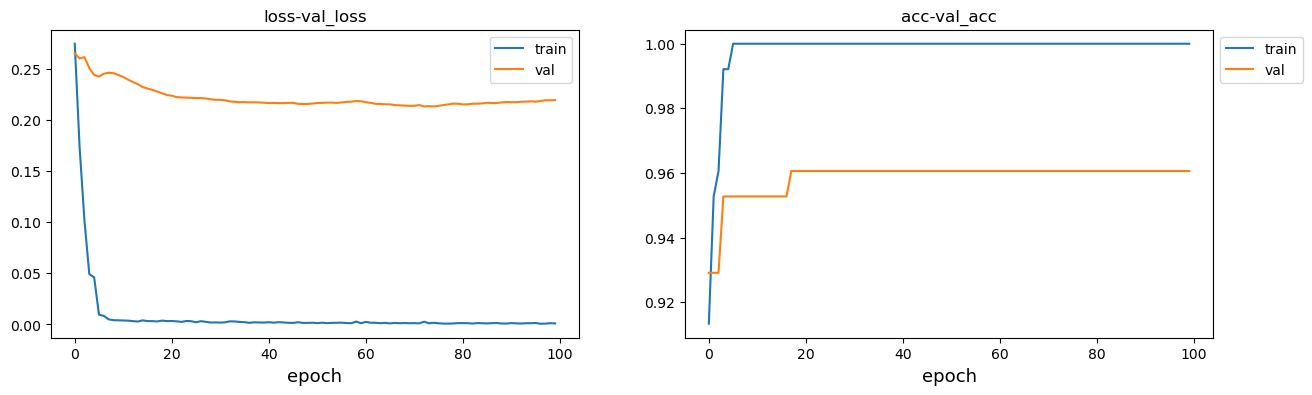

In [72]:
# plotting the history of training
fig, axis = plt.subplots(1, 2, figsize=(15, 4))

axis[0].plot(history.history["loss"], label="train")
axis[0].plot(history.history["val_loss"], label="val")
axis[0].set_title("loss-val_loss")
axis[0].set_xlabel("epoch", fontsize=13)
axis[0].legend(bbox_to_anchor=(1.0, 1.0))


axis[1].plot(history.history["acc"], label="train")
axis[1].plot(history.history["val_acc"], label="val")
axis[1].set_title("acc-val_acc")
axis[1].set_xlabel("epoch", fontsize=13)
axis[1].legend(bbox_to_anchor=(1.0, 1.0))


plt.show()

In [74]:
model_review_clf = tf.keras.models.load_model("models/model_review_clf.h5")

In [76]:
history = model_review_clf.fit(init_x, init_y, epochs=100, batch_size=32)
# finally training on the whole given data

Epoch 1/100
8/8 [==============================] - 4s 64ms/step - loss: 0.1461 - acc: 0.9803
Epoch 2/100
8/8 [==============================] - 1s 64ms/step - loss: 0.0527 - acc: 0.9843
Epoch 3/100
8/8 [==============================] - 1s 63ms/step - loss: 0.0272 - acc: 0.9961
Epoch 4/100
8/8 [==============================] - 1s 63ms/step - loss: 0.0085 - acc: 0.9961
Epoch 5/100
8/8 [==============================] - 1s 63ms/step - loss: 0.0078 - acc: 0.9961
Epoch 6/100
8/8 [==============================] - 1s 68ms/step - loss: 0.0024 - acc: 1.0000
Epoch 7/100
8/8 [==============================] - 1s 64ms/step - loss: 0.0026 - acc: 1.0000
Epoch 8/100
8/8 [==============================] - 1s 73ms/step - loss: 0.0023 - acc: 1.0000
Epoch 9/100
8/8 [==============================] - 1s 62ms/step - loss: 0.0017 - acc: 1.0000
Epoch 10/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0019 - acc: 1.0000
Epoch 11/100
8/8 [==============================] - 1s 63ms/step - lo

In [77]:
model_review_clf.save("models/model_review_clf.h5")

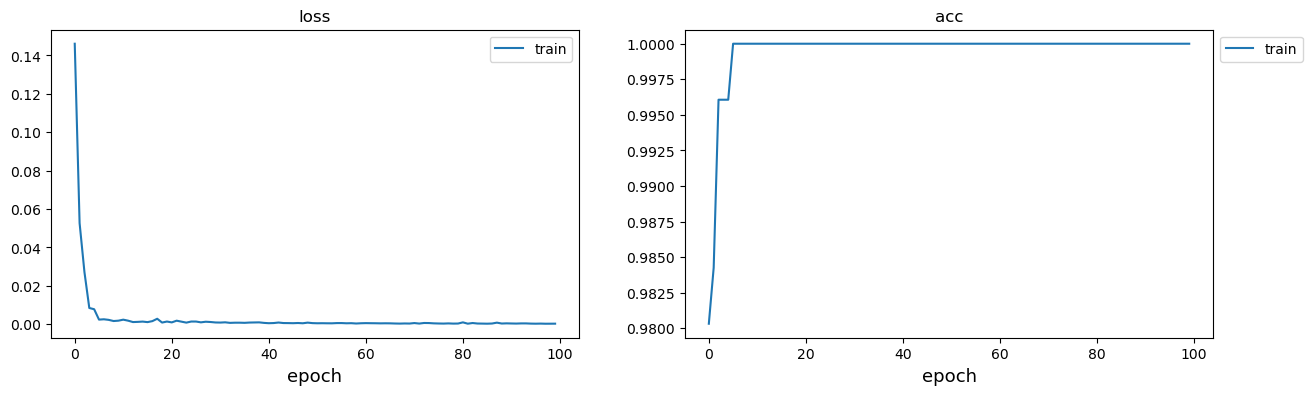

In [83]:
# plotting the history of training
fig, axis = plt.subplots(1, 2, figsize=(15, 4))

axis[0].plot(history.history["loss"], label="train")
#axis[0].plot(history.history["val_loss"], label="val")
axis[0].set_title("loss")
axis[0].set_xlabel("epoch", fontsize=13)
axis[0].legend(bbox_to_anchor=(1.0, 1.0))


axis[1].plot(history.history["acc"], label="train")
#axis[1].plot(history.history["val_acc"], label="val")
axis[1].set_title("acc")
axis[1].set_xlabel("epoch", fontsize=13)
axis[1].legend(bbox_to_anchor=(1.0, 1.0))


plt.show()

None
